In [1]:
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
data_df = pd.read_csv('../data/all_tips_data.csv')
print data_df.shape
data_df.head()

(617, 52)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,enduserid,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
0,10001,1940-12-22,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,183,12,53,2015-07-13,0.773585,147.0,68.0,55.0,269.2,97.0,57.0,27231 days 00:00:00.000000000,38,371 days 00:00:00.000000000,3,1,3,6,1,14,3
1,10002,1933-04-24,0.0,0.0,0.0,1.0,0.0,NaN,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,185,24,50,2015-08-10,0.520000,135.0,74.0,69.0,195.8,96.0,62.0,30058 days 00:00:00.000000000,21,353 days 00:00:00.000000000,1,0,0,4,2,7,4
2,10004,1948-12-15,0.0,NaN,0.0,0.0,NaN,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,NaN,NaN,188,1,2,2015-12-21,0.500000,110.0,75.0,72.0,252.0,97.0,71.0,24477 days 00:00:00.000000000,8,172 days 00:00:00.000000000,1,0,1,3,0,5,2
3,10006,1948-11-28,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,193,24,51,2015-07-20,0.529412,122.0,78.0,61.0,250.7,97.0,60.0,24340 days 00:00:00.000000000,18,357 days 00:00:00.000000000,0,0,0,2,0,2,2
4,10009,1927-10-06,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,196,9,53,2015-07-13,0.830189,144.0,86.0,72.0,152.1,93.0,71.0,32057 days 00:00:00.000000000,49,371 days 00:00:00.000000000,1,0,0,2,0,3,1


In [3]:
data_df.count(0)

pin                        617
d.o.b.                     515
medicaid                   456
hospitalized               514
rpm_hospitalized           617
rpm_falls                  617
rehospitalized             512
rpm_rehospitalized          95
chf                        617
copd                       617
diabetes                   617
hypertension               617
stroke                     617
hypoglycemia               617
falls                      617
liver_disease              617
hypotension                617
obesity                    617
coronary_artery_disease    617
fractures                  617
renal                      617
alzheimers                 617
depression                 617
status_active              617
gender_f                   617
gender_m                   617
lang_english               617
lang_other                 617
lang_spanish               617
caregiver                  509
live_alone                 509
enduserid                  617
missed_w

In [104]:
data_df['pin_flag']=data_df['pin'].apply(lambda x: str(x)[0]=='6')
data_df['pin_flag'].value_counts(dropna=False)

False    532
True      85
Name: pin_flag, dtype: int64

In [111]:
this_data = data_df[data_df['pin_flag']==True]
print this_data.shape
this_data.head()

(85, 53)


,pin,d.o.b.,medicaid,hospitalized,rpm_hospitalized,rpm_falls,rehospitalized,rpm_rehospitalized,chf,copd,diabetes,hypertension,stroke,hypoglycemia,falls,liver_disease,hypotension,obesity,coronary_artery_disease,fractures,renal,alzheimers,depression,status_active,gender_f,gender_m,lang_english,lang_other,lang_spanish,caregiver,live_alone,enduserid,missed_wks,total_wks,first_measure_date,compliance,systolic,diastolic,heartrate,weight,spo2,heartrate_spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds,pin_flag
241,60003,1956-04-23,1.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,467,8,50,2015-08-11,0.840000,143.0,98.0,80.0,268.1,97.0,87.0,21659 days 00:00:00.000000000,66,353 days 00:00:00.000000000,0,3,1,7,0,11,1,True
242,60004,1957-04-28,1.0,0.0,0.0,0.0,0.0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,468,0,6,2015-08-11,1.000000,112.0,80.0,107.0,215.8,94.0,109.0,21289 days 00:00:00.000000000,41,332 days 00:00:00.000000000,9,0,1,0,0,10,1,True
243,60005,1956-01-15,1.0,1.0,1.0,1.0,0.0,0.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,469,11,36,2015-08-18,0.694444,126.0,81.0,87.0,202.4,99.0,86.0,21765 days 00:00:00.000000000,31,315 days 00:00:00.000000000,6,1,1,0,3,11,4,True
244,60006,1963-12-11,1.0,0.0,1.0,1.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,472,21,38,2015-10-13,0.447368,154.0,108.0,82.0,184.5,93.0,71.0,18934 days 00:00:00.000000000,17,266 days 00:00:00.000000000,1,1,1,0,1,4,2,True
245,60008,1984-08-30,1.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,479,27,46,2015-08-14,0.413043,133.0,91.0,109.0,230.8,98.0,105.0,11306 days 00:00:00.000000000,11,326 days 00:00:00.000000000,0,0,0,1,0,1,0,True


In [107]:
this_data['hospitalized'].value_counts(dropna=False)

 0.0    59
 1.0    24
NaN      2
Name: hospitalized, dtype: int64

In [106]:
this_data['rpm_hospitalized'].value_counts(dropna=False)

0.0    53
1.0    32
Name: rpm_hospitalized, dtype: int64

In [109]:
this_data['duration_in_program']=this_data['duration_in_program'].apply(lambda x: pd.tslib.Timedelta(x).days)
this_data['duration_in_program'].mean()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


205.24705882352941

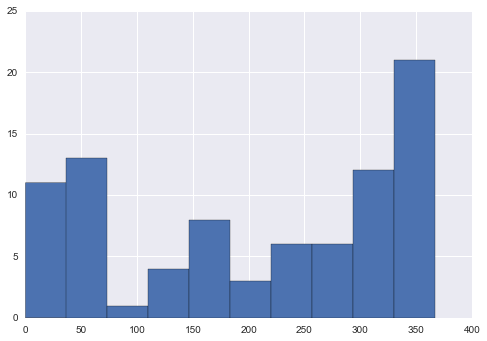

In [110]:
this_data['duration_in_program'].hist()

In [63]:
new_data = this_data.drop(['pin', 'd.o.b.', 'rpm_rehospitalized', 'rpm_falls', 'gender_m', 'alzheimers','hypotension',
                           'lang_other','missed_wks', 'total_wks', 'first_measure_date', 'status_active','lang_english',
                           'heartrate_spo2','hypoglycemia','fractures','renal','liver_disease','enduserid','pin_flag'],
                          axis = 1)
new_data.dropna(inplace=True)
new_data.reset_index(drop=True,inplace=True)
print new_data.shape
new_data.dtypes

(65, 33)


medicaid                   float64
hospitalized               float64
rpm_hospitalized           float64
rehospitalized             float64
chf                          int64
copd                         int64
diabetes                     int64
hypertension                 int64
stroke                       int64
falls                        int64
obesity                      int64
coronary_artery_disease      int64
depression                   int64
gender_f                   float64
lang_spanish               float64
caregiver                  float64
live_alone                 float64
compliance                 float64
systolic                   float64
diastolic                  float64
heartrate                  float64
weight                     float64
spo2                       float64
age                         object
number_visits                int64
duration_in_program         object
feeling_trigger              int64
hosp_er_trigger              int64
dosage_trigger      

In [64]:
new_data['age']=new_data['age'].apply(lambda x: pd.tslib.Timedelta(x).days)
new_data['duration_in_program']=new_data['duration_in_program'].apply(lambda x: pd.tslib.Timedelta(x).days)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001FD3A0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000209A6080>]], dtype=object)

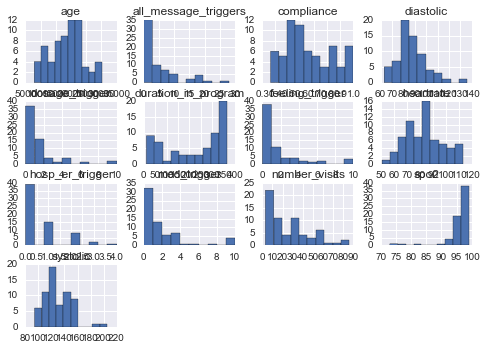

In [88]:
continuous_feats = ['age','compliance','spo2','heartrate','diastolic','systolic','number_visits',
                    'duration_in_program','all_message_triggers','feeling_trigger','hosp_er_trigger',
                   'dosage_trigger','med_trigger']
new_data[continuous_feats].hist()

In [66]:
for feature in continuous_feats:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(new_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(new_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print (new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))]).index
    display(new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))])
    

Data points considered outliers for the feature 'age':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds


Data points considered outliers for the feature 'compliance':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds


Data points considered outliers for the feature 'spo2':
Int64Index([9, 18, 55, 59], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
9,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.840000,126.0,90.0,67.0,194.0,76.0,17174,78,350,1,0,0,0,0,1,0
18,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.673469,98.0,76.0,83.0,164.2,73.0,21915,41,343,4,0,2,2,0,8,2
55,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.500000,116.0,83.0,98.0,119.3,90.0,17161,6,45,1,4,1,2,0,8,0
59,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.833333,133.0,89.0,73.0,189.2,82.0,11948,15,67,1,1,0,0,0,2,0


Data points considered outliers for the feature 'heartrate':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds


Data points considered outliers for the feature 'diastolic':
Int64Index([57, 58], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
57,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.52381,145.0,136.0,64.0,185.8,98.0,21522,12,147,0,3,0,0,2,5,0
58,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.60000,154.0,118.0,84.0,159.0,98.0,13696,8,42,1,0,0,2,0,3,0


Data points considered outliers for the feature 'systolic':
Int64Index([12, 62], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
12,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564,50,353,5,2,1,10,0,18,2
62,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.714286,193.0,84.0,75.0,185.0,99.0,20417,6,49,0,0,0,0,0,0,1


Data points considered outliers for the feature 'number_visits':
Int64Index([25], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
25,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.92,119.0,70.0,84.0,128.7,92.0,30304,86,353,0,1,0,0,1,2,1


Data points considered outliers for the feature 'duration_in_program':
Int64Index([], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds


Data points considered outliers for the feature 'all_message_triggers':
Int64Index([8, 11, 12, 24, 27, 43], dtype='int64')


,medicaid,hospitalized,rpm_hospitalized,rehospitalized,chf,copd,diabetes,hypertension,stroke,falls,obesity,coronary_artery_disease,depression,gender_f,lang_spanish,caregiver,live_alone,compliance,systolic,diastolic,heartrate,weight,spo2,age,number_visits,duration_in_program,feeling_trigger,hosp_er_trigger,dosage_trigger,med_trigger,fall_trigger,all_message_triggers,n_conds
8,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,1.0,0.0,0.0,1.0,0.617021,121.0,83.0,51.0,178.4,95.0,28386,35,329,10,2,2,3,0,17,2
11,1.0,0.0,1.0,0.0,1,0,0,1,1,1,0,1,1,1.0,0.0,0.0,1.0,0.700000,158.0,81.0,67.0,182.5,94.0,23500,38,353,3,1,9,9,6,28,6
12,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.740000,205.0,108.0,66.0,181.4,98.0,19564,50,353,5,2,1,10,0,18,2
24,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,1,1.0,1.0,0.0,1.0,0.588235,157.0,90.0,103.0,219.4,98.0,19431,34,301,9,1,4,3,1,18,2
27,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.595745,94.0,74.0,63.0,134.9,98.0,12217,23,329,0,0,10,10,0,20,0
43,1.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.604167,146.0,99.0,97.0,245.4,97.0,13480,32,336,4,2,6,5,0,17,3


In [97]:
age_outliers  = []
hr_outliers = []
spo2_outliers = [9,18,59]
diastol_outliers = [57,58]
systol_outliers = [12,62]
compl_outliers = []
#outliers = [137, 170, 177, 179, 180, 196, 200, 206, 210, 213, 216, 218, 219, 221,
#            224, 226, 231, 232, 236, 237, 269,182,191,297, 309, 366]
outliers = age_outliers + hr_outliers + spo2_outliers + compl_outliers + systol_outliers + diastol_outliers
# Remove the outliers, if any were specified
good_data = new_data.drop(new_data.index[outliers]).reset_index(drop = True)
print good_data.shape

(58, 33)


C:\Anaconda2\lib\site-packages\pandas\tools\plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022DE0320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000022C05588>]], dtype=object)

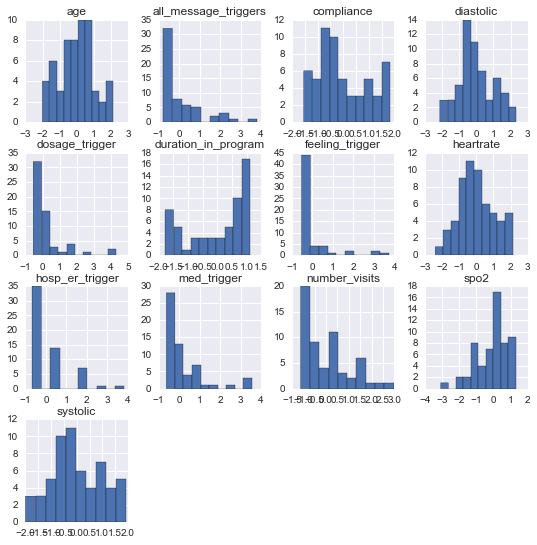

In [98]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
nrmlzr = Normalizer()
stdsclr = StandardScaler()
#good_data[continuous_feats] = nrmlzr.fit_transform(good_data[continuous_feats])
good_data[continuous_feats] = stdsclr.fit_transform(good_data[continuous_feats])
f, ax = plt.subplots(figsize=(9, 9))
good_data[continuous_feats].hist(ax=ax)

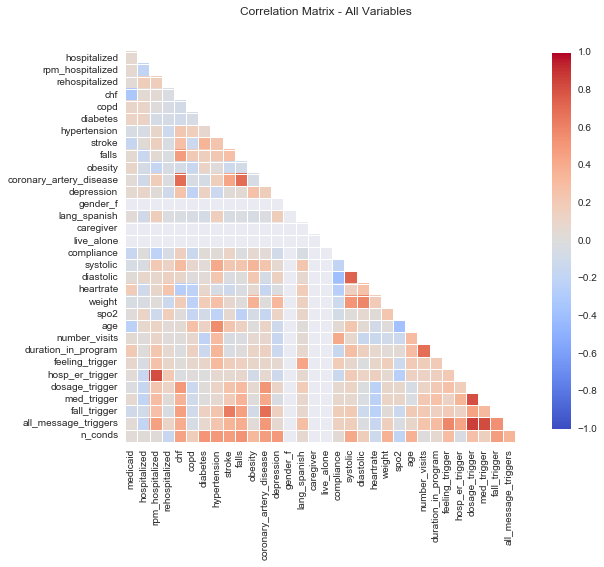

In [99]:
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(good_data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

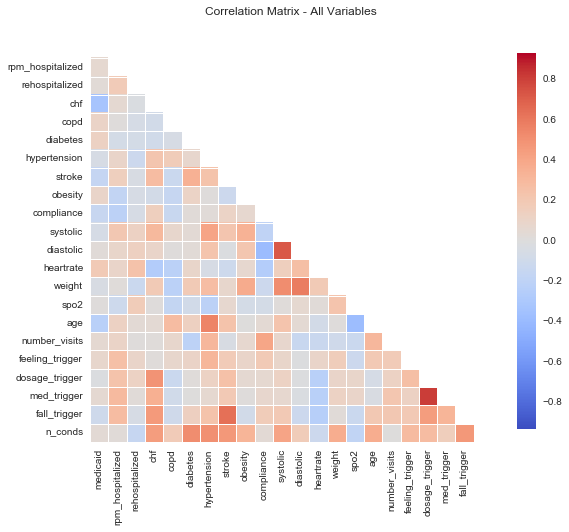

In [100]:
good_data.drop(['gender_f','caregiver','live_alone','duration_in_program','depression','lang_spanish',
               'hospitalized','falls','coronary_artery_disease','hosp_er_trigger','all_message_triggers'],axis=1,inplace=True)
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(good_data, annot=False, sig_stars=False,
             diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

In [101]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data.drop(['rpm_hospitalized'],axis=1), good_data['rpm_hospitalized'], stratify=good_data['rpm_hospitalized'],test_size=0.1, random_state=42)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
print score
from sklearn.grid_search import GridSearchCV
#set parameters
logr_parameters = {'penalty':['l2','l1'],'tol':[.001,.0001,.01],
                    'C':[1.0,.9],'max_iter':[100,500]}
#grid search initialization
grid_obj = GridSearchCV(clf,param_grid = logr_parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)
print grid_obj.best_estimator_
print grid_obj.best_score_
print grid_obj.scorer_
print grid_obj.score(X_test,y_test)
lr_result = pd.DataFrame(data=grid_obj.best_estimator_.coef_.T,columns=['coef'],index=good_data.drop(['rpm_hospitalized'],axis=1).columns)
lr_result['exp coef']=np.exp(lr_result['coef'])
lr_result

0.833333333333
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)
0.634615384615
<function _passthrough_scorer at 0x000000001043CDD8>
0.833333333333


,coef,exp coef
medicaid,0.000000,1.000000
rehospitalized,0.000000,1.000000
chf,0.000000,1.000000
copd,0.000000,1.000000
diabetes,0.000000,1.000000
hypertension,0.000000,1.000000
stroke,0.000000,1.000000
obesity,-0.404587,0.667252
compliance,-0.789180,0.454217
systolic,0.551513,1.735877


In [102]:
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
# fit the model
result = logit.fit(method='bfgs')
print result.summary()

         Current function value: 0.334469
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:       rpm_hospitalized   No. Observations:                   52
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                           21
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.4905
Time:                        13:35:04   Log-Likelihood:                -17.392
converged:                      False   LL-Null:                       -34.136
                                        LLR p-value:                   0.04109
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -1.2174      6.554     -0.186      0.853       

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
